In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('C:/Users/Akshay/Downloads/Airlines+Data.xlsx')

In [4]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
data.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
data = data.set_index(data['Month'])

In [7]:
data.drop('Month' , axis =1 , inplace = True)

In [8]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [9]:
data.shape

(96, 1)

In [10]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


<AxesSubplot:xlabel='Month'>

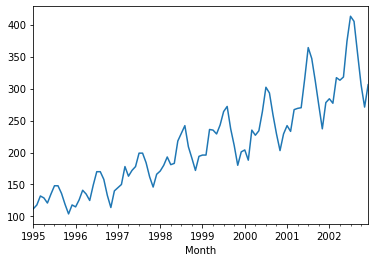

In [12]:
data['Passengers'].plot()

we can see that it is a seasonal data

In [13]:
data.isnull().sum()

Passengers    0
dtype: int64

there are no missing values

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


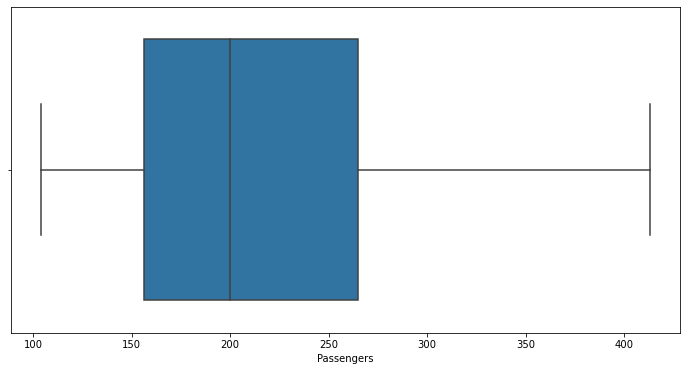

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Passengers'])
plt.show()

there are no outliers and it is right skewed data

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<ipython-input-16-69bc2ef08843>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(data['Passengers'],freq= 12)


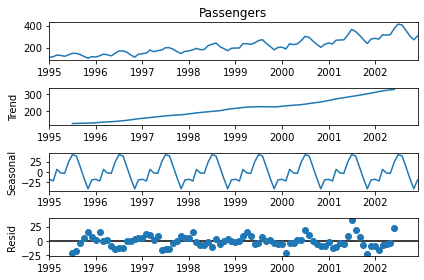

In [16]:
decompose_ts_add = seasonal_decompose(data['Passengers'],freq= 12)
decompose_ts_add.plot()
plt.show()

In [17]:
len(data)

96

In [18]:
(20/100)*96

19.200000000000003

In [19]:
96-19

77

In [20]:
train = data.head(77)

In [21]:
train

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2001-01-01,242
2001-02-01,233
2001-03-01,267


In [22]:
test = data.tail(19)

In [23]:
test

,Passengers
Month,
2001-06-01,315
2001-07-01,364
2001-08-01,347
2001-09-01,312
2001-10-01,274
2001-11-01,237
2001-12-01,278
2002-01-01,284
2002-02-01,277


The data has a trend as well as a seasonal component

In [24]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [25]:
from sklearn.metrics import mean_squared_error

# Simple Moving Average

<AxesSubplot:xlabel='Month'>

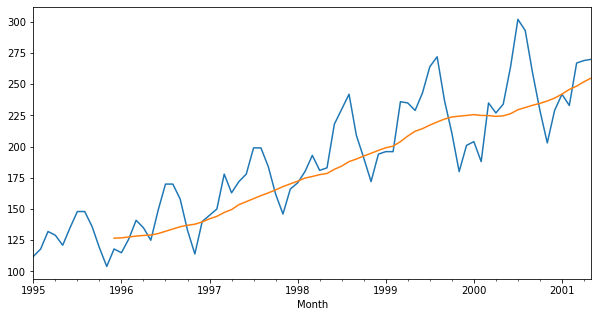

In [26]:
train['Passengers'].plot()
train['Passengers'].rolling(12).mean().plot(figsize = (10,5
                                                       ))

In [27]:
forecast = test.copy()

In [28]:
forecast['sma_forecast'] = test['Passengers'].rolling(8).mean()

In [29]:
forecast

,Passengers,sma_forecast
Month,,
2001-06-01,315,NaN
2001-07-01,364,NaN
2001-08-01,347,NaN
2001-09-01,312,NaN
2001-10-01,274,NaN
2001-11-01,237,NaN
2001-12-01,278,NaN
2002-01-01,284,301.375
2002-02-01,277,296.625


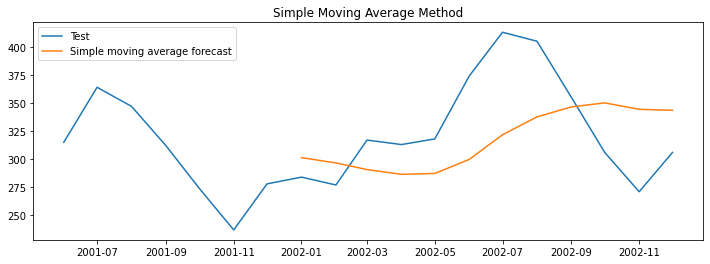

In [30]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [31]:
forecast = forecast.fillna(0)

In [32]:
forecast

,Passengers,sma_forecast
Month,,
2001-06-01,315,0.000
2001-07-01,364,0.000
2001-08-01,347,0.000
2001-09-01,312,0.000
2001-10-01,274,0.000
2001-11-01,237,0.000
2001-12-01,278,0.000
2002-01-01,284,301.375
2002-02-01,277,296.625


In [33]:
mse = mean_squared_error(forecast['sma_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

190.32041239709417

# Cumulative moving average

<AxesSubplot:xlabel='Month'>

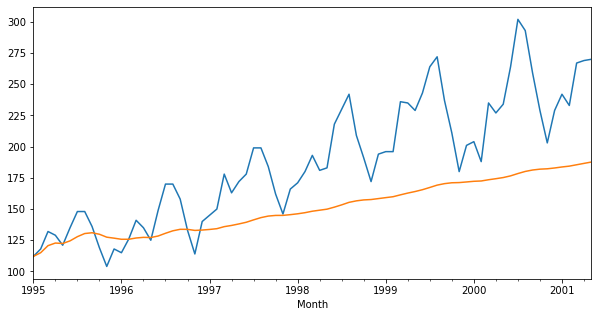

In [34]:
train['Passengers'].plot()
train['Passengers'].expanding().mean().plot(figsize = (10,5
                                                       ))

In [35]:
forecast['cma_forecast'] = test['Passengers'].expanding().mean()

In [36]:
forecast

,Passengers,sma_forecast,cma_forecast
Month,,,
2001-06-01,315,0.000,315.000000
2001-07-01,364,0.000,339.500000
2001-08-01,347,0.000,342.000000
2001-09-01,312,0.000,334.500000
2001-10-01,274,0.000,322.400000
2001-11-01,237,0.000,308.166667
2001-12-01,278,0.000,303.857143
2002-01-01,284,301.375,301.375000
2002-02-01,277,296.625,298.666667


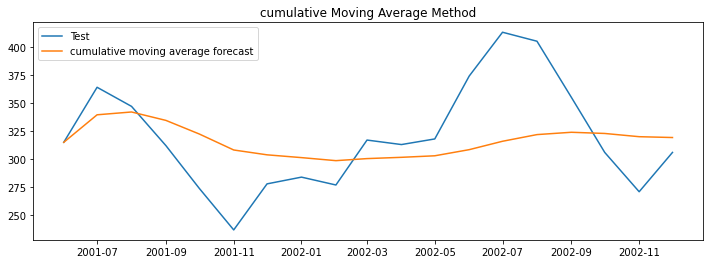

In [37]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['cma_forecast'], label='cumulative moving average forecast')
plt.legend(loc='best')
plt.title('cumulative Moving Average Method')
plt.show()

In [38]:
mse = mean_squared_error(forecast['cma_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

42.95724372668785

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Simple Exponential method

In [40]:
import warnings
warnings.filterwarnings("ignore")
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)

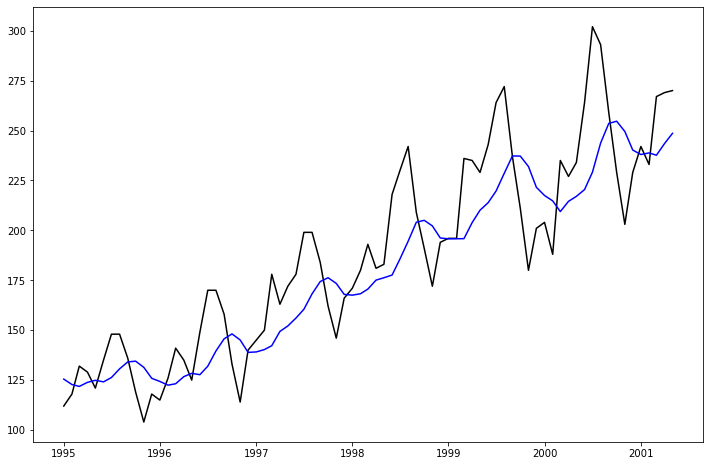

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(train['Passengers'] , color="black")
plt.plot(ses_model.fittedvalues, color="blue")

In [42]:
forecast['ses_forecast'] = ses_model.forecast(len(test))

In [43]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast
Month,,,,
2001-06-01,315,0.000,315.000000,252.879249
2001-07-01,364,0.000,339.500000,252.879249
2001-08-01,347,0.000,342.000000,252.879249
2001-09-01,312,0.000,334.500000,252.879249
2001-10-01,274,0.000,322.400000,252.879249
2001-11-01,237,0.000,308.166667,252.879249
2001-12-01,278,0.000,303.857143,252.879249
2002-01-01,284,301.375,301.375000,252.879249
2002-02-01,277,296.625,298.666667,252.879249


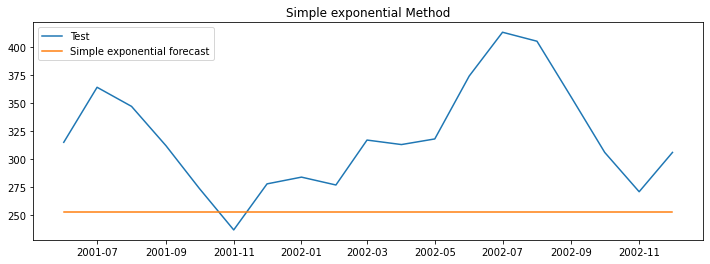

In [44]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['ses_forecast'], label='Simple exponential forecast')
plt.legend(loc='best')
plt.title('Simple exponential Method')
plt.show()

In [45]:
MAPE(forecast['ses_forecast'],test.Passengers)

19.907063237282795

In [46]:
mse = mean_squared_error(forecast['ses_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

80.54332901444145

# Exponential Weighted Moving Average

<AxesSubplot:xlabel='Month'>

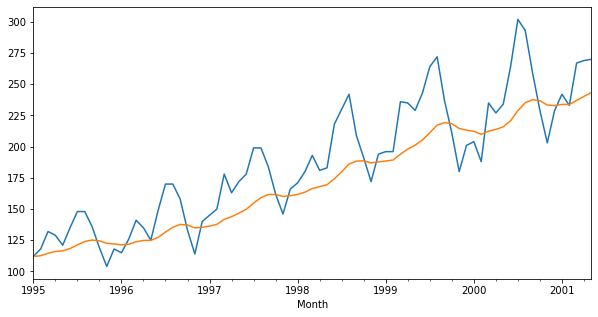

In [47]:
plt.figure(figsize = (10,5))
train['Passengers'].plot()
train['Passengers'].ewm(alpha=0.1, adjust=False).mean().plot()

In [48]:
forecast['ewm_forecast'] = test['Passengers'].ewm(alpha=0.1, adjust=False).mean()

In [49]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast,ewm_forecast
Month,,,,,
2001-06-01,315,0.000,315.000000,252.879249,315.000000
2001-07-01,364,0.000,339.500000,252.879249,319.900000
2001-08-01,347,0.000,342.000000,252.879249,322.610000
2001-09-01,312,0.000,334.500000,252.879249,321.549000
2001-10-01,274,0.000,322.400000,252.879249,316.794100
2001-11-01,237,0.000,308.166667,252.879249,308.814690
2001-12-01,278,0.000,303.857143,252.879249,305.733221
2002-01-01,284,301.375,301.375000,252.879249,303.559899
2002-02-01,277,296.625,298.666667,252.879249,300.903909


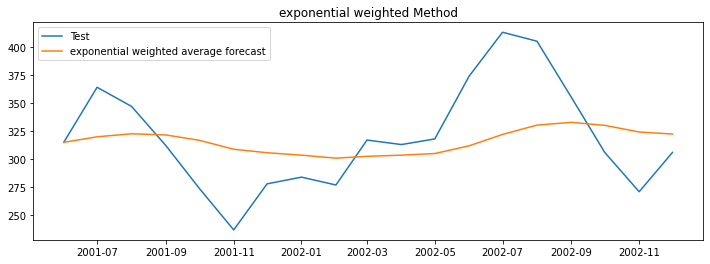

In [50]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['ewm_forecast'], label='exponential weighted average forecast')
plt.legend(loc='best')
plt.title('exponential weighted Method')
plt.show()

In [51]:
MAPE(forecast['ewm_forecast'],test.Passengers)

10.60412225174807

In [52]:
mse = mean_squared_error(forecast['ewm_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

42.11192704440786

# Holts linear method

In [53]:
import warnings
warnings.filterwarnings("ignore")
hm_model = Holt(train['Passengers']).fit(smoothing_level=0.1, smoothing_slope=0.2)

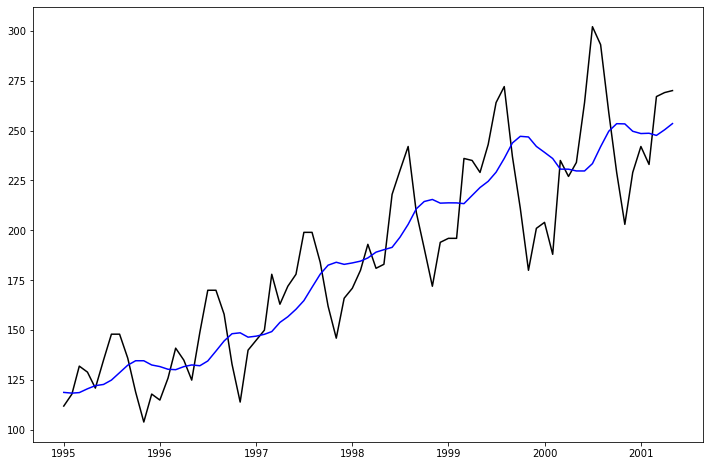

In [54]:
plt.figure(figsize=(12, 8))
plt.plot(train['Passengers'],  color="black")
plt.plot(hm_model.fittedvalues,  color="blue")

In [55]:
forecast['hm_forecast'] = hm_model.forecast(len(test))

In [56]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast,ewm_forecast,hm_forecast
Month,,,,,,
2001-06-01,315,0.000,315.000000,252.879249,315.000000,256.696728
2001-07-01,364,0.000,339.500000,252.879249,319.900000,258.270501
2001-08-01,347,0.000,342.000000,252.879249,322.610000,259.844273
2001-09-01,312,0.000,334.500000,252.879249,321.549000,261.418045
2001-10-01,274,0.000,322.400000,252.879249,316.794100,262.991818
2001-11-01,237,0.000,308.166667,252.879249,308.814690,264.565590
2001-12-01,278,0.000,303.857143,252.879249,305.733221,266.139362
2002-01-01,284,301.375,301.375000,252.879249,303.559899,267.713135
2002-02-01,277,296.625,298.666667,252.879249,300.903909,269.286907


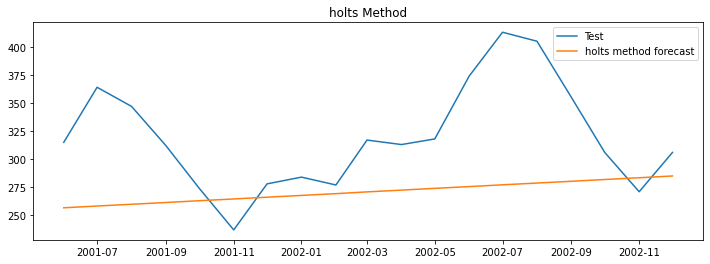

In [57]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['hm_forecast'], label='holts method forecast')
plt.legend(loc='best')
plt.title('holts Method')
plt.show()

In [58]:
MAPE(forecast['hm_forecast'],test.Passengers)

15.232988957438106

In [59]:
mse = mean_squared_error(forecast['hm_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

65.9462652107133

# Holts winter exponential smoothing with additive seasonality and additive trend

In [60]:
import warnings
warnings.filterwarnings("ignore")
hwm_model = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level
                                                                                                         =0.1, smoothing_slope= 0.2)

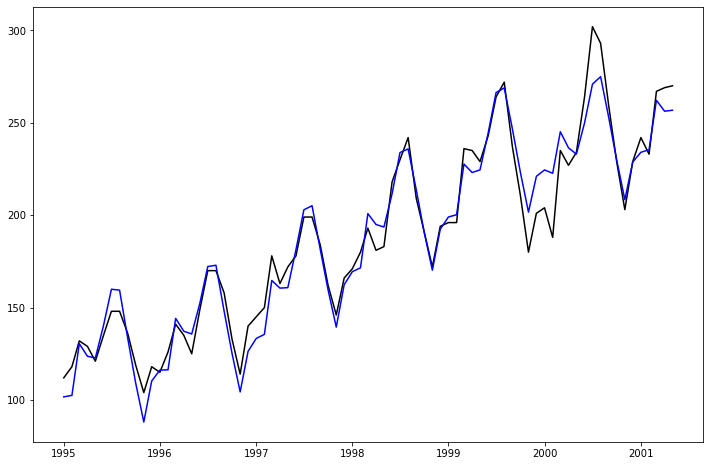

In [61]:
plt.figure(figsize=(12, 8))
plt.plot(train['Passengers'],  color="black")
plt.plot(hwm_model.fittedvalues,  color="blue")

In [62]:
forecast['hwm_forecast'] = hwm_model.forecast(len(test))

In [63]:
forecast

,Passengers,sma_forecast,cma_forecast,ses_forecast,ewm_forecast,hm_forecast,hwm_forecast
Month,,,,,,,
2001-06-01,315,0.000,315.000000,252.879249,315.000000,256.696728,276.917257
2001-07-01,364,0.000,339.500000,252.879249,319.900000,258.270501,298.167106
2001-08-01,347,0.000,342.000000,252.879249,322.610000,259.844273,300.227435
2001-09-01,312,0.000,334.500000,252.879249,321.549000,261.418045,276.931822
2001-10-01,274,0.000,322.400000,252.879249,316.794100,262.991818,254.113419
2001-11-01,237,0.000,308.166667,252.879249,308.814690,264.565590,233.272290
2001-12-01,278,0.000,303.857143,252.879249,305.733221,266.139362,254.907990
2002-01-01,284,301.375,301.375000,252.879249,303.559899,267.713135,260.903958
2002-02-01,277,296.625,298.666667,252.879249,300.903909,269.286907,262.073102


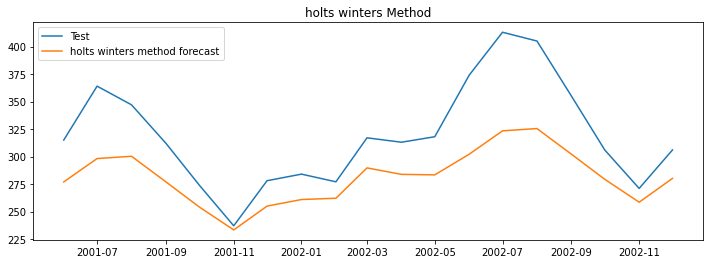

In [64]:
plt.figure(figsize=(12,4))
plt.plot(test['Passengers'], label='Test')
plt.plot(forecast['hwm_forecast'], label='holts winters method forecast')
plt.legend(loc='best')
plt.title('holts winters Method')
plt.show()

In [65]:
MAPE(forecast['hm_forecast'],test.Passengers)

15.232988957438106

In [66]:
mse = mean_squared_error(forecast['hwm_forecast'],test.Passengers)
RMSE = np.sqrt(mse)
RMSE

44.47067744598681

# We conclude that the exponential weighted moving average method in the smoothing techniques is able to forecast the sales closer to the actual values.The RMSE values for this method are lower as compared to other model methods. This method is very well able to capture the trend and seasonality in the data.

# Autoregressive models

Dicky fuller test

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))

In [69]:
adf_test(data['Passengers'])

ADF Statistics: 1.3402479596467023
p- value: 0.9968250481137263


# data is not stationary , we can do differencing

In [70]:
data['Passengers First Difference']=data['Passengers']-data['Passengers'].shift(1)

In [71]:
data

,Passengers,Passengers First Difference
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [72]:
adf_test(data['Passengers First Difference'].dropna())

ADF Statistics: -2.1500017359206396
p- value: 0.22488942647513105


In [73]:
data['Passengers Second Difference']=data['Passengers First Difference']-data['Passengers First Difference'].shift(1)

In [74]:
data

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1995-01-01,112,NaN,NaN
1995-02-01,118,6.0,NaN
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


In [75]:
data = data.fillna(0)

In [76]:
data

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1995-01-01,112,0.0,0.0
1995-02-01,118,6.0,0.0
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


In [77]:
adf_test(data['Passengers Second Difference'].dropna())

ADF Statistics: -11.774420925133924
p- value: 1.070863259108044e-21


In [78]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# PACF plot

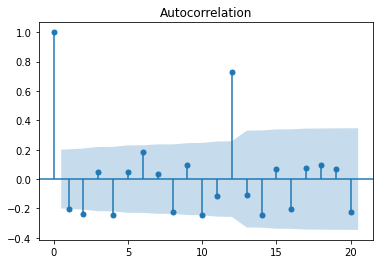

In [79]:
acf = plot_acf(data["Passengers Second Difference"].dropna())

# ACF plot

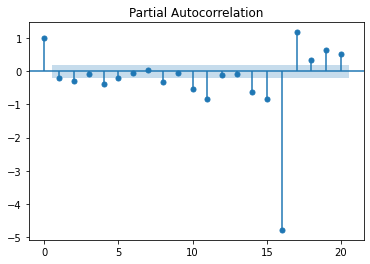

In [80]:
acf = plot_pacf(data["Passengers Second Difference"].dropna())

In [81]:
train_diff = data['Passengers Second Difference'].head(77)

In [82]:
train_diff

Month
1995-01-01     0.0
1995-02-01     0.0
1995-03-01     8.0
1995-04-01   -17.0
1995-05-01    -5.0
              ... 
2001-01-01   -13.0
2001-02-01   -22.0
2001-03-01    43.0
2001-04-01   -32.0
2001-05-01    -1.0
Name: Passengers Second Difference, Length: 77, dtype: float64

In [83]:
test_diff = data['Passengers Second Difference'].tail(19)

In [84]:
test_diff

Month
2001-06-01    44.0
2001-07-01     4.0
2001-08-01   -66.0
2001-09-01   -18.0
2001-10-01    -3.0
2001-11-01     1.0
2001-12-01    78.0
2002-01-01   -35.0
2002-02-01   -13.0
2002-03-01    47.0
2002-04-01   -44.0
2002-05-01     9.0
2002-06-01    51.0
2002-07-01   -17.0
2002-08-01   -47.0
2002-09-01   -42.0
2002-10-01     1.0
2002-11-01    14.0
2002-12-01    70.0
Name: Passengers Second Difference, dtype: float64

# Auto regression method (AR)

In [85]:
from statsmodels.tsa.arima_model import ARIMA

In [86]:
import warnings
warnings.filterwarnings("ignore")
model_ar = ARIMA(train_diff, order=(10, 0, 0)).fit()

In [87]:
model_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Passengers Second Difference   No. Observations:                   77
Model:                              ARMA(10, 0)   Log Likelihood                -331.863
Method:                                 css-mle   S.D. of innovations             17.625
Date:                          Mon, 23 May 2022   AIC                            687.725
Time:                                  00:06:32   BIC                            715.851
Sample:                              01-01-1995   HQIC                           698.975
                                   - 05-01-2001                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.0043      0.345     -0.012      0.990      -0.681       0.672
ar.L1.Passengers Second Difference     -0.5996      0.105     -5.728      0.000      -0.805      -0.394
ar.L2.Passengers Second Difference     -0.7389      0.121     -6.092      0.000      -0.977      -0.501
ar.L3.Passengers Second Difference     -0.5217      0.137     -3.809      0.000      -0.790      -0.253
ar.L4.Passengers Second Difference     -0.7363      0.146     -5.027      0.000      -1.023      -0.449
ar.L5.Passengers Second Difference     -0.5021      0.160     -3.147      0.002      -0.815      -0.189
ar.L6.Passengers Second Difference     -0.5342      0.159     -3.370      0.001      -0.845      -0.224
ar.L7.Passengers Second Difference     -0.3358      0.149     -2.259      0.024      -0.627      -0.044
ar.L8.Passengers Second Difference     -0.5382      0.139     -3.886      0.000      -0.810      -0.267
ar.L9.Passengers Second Difference     -0.2804      0.128     -2.198      0.028      -0.530      -0.030
ar.L10.Passengers Second Difference    -0.3874      0.110     -3.529      0.000      -0.603      -0.172
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9172           -0.5888j            1.0899           -0.0908
AR.2             0.9172           +0.5888j            1.0899            0.0908
AR.3             0.4822           -0.9618j            1.0759           -0.1760
AR.4             0.4822           +0.9618j            1.0759            0.1760
AR.5            -0.9837           -0.4231j            1.0708           -0.4354
AR.6            -0.9837           +0.4231j            1.0708            0.4354
AR.7            -0.6340           -0.8981j            1.0993           -0.3478
AR.8            -0.6340           +0.8981j            1.0993            0.3478
AR.9            -0.1435           -1.1551j            1.1639           -0.2697
AR.10           -0.1435           +1.1551j            1.1639            0.2697
------------------------------------------------------------------------------
"""

In [88]:
pred_start_date=test_diff.index[0]
pred_end_date=test_diff.index[-1]

In [89]:
forecast_reg = test.copy()

In [90]:
forecast_reg['AR_forecast'] = model_ar.predict(start = pred_start_date,end = pred_end_date)

In [91]:
forecast_reg

,Passengers,AR_forecast
Month,,
2001-06-01,315,18.455507
2001-07-01,364,-18.380846
2001-08-01,347,-14.691962
2001-09-01,312,4.824939
2001-10-01,274,2.437052
2001-11-01,237,6.219580
2001-12-01,278,16.139742
2002-01-01,284,-15.271529
2002-02-01,277,6.504676


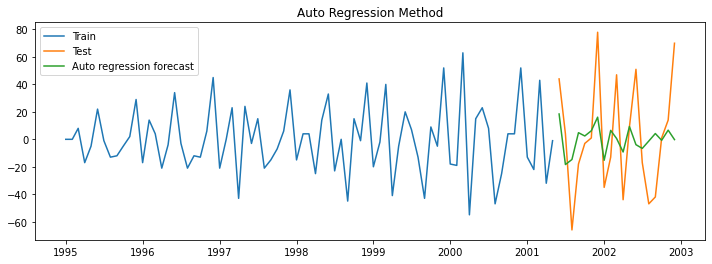

In [92]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['AR_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [93]:
mse = mean_squared_error(forecast_reg['AR_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

36.02483852848112

# Moving average method (MA)

In [94]:
import warnings
warnings.filterwarnings("ignore")
model_ma = ARIMA(train_diff, order=(0, 0, 1)).fit()

In [95]:
model_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Passengers Second Difference   No. Observations:                   77
Model:                               ARMA(0, 1)   Log Likelihood                -337.310
Method:                                 css-mle   S.D. of innovations             18.792
Date:                          Mon, 23 May 2022   AIC                            680.621
Time:                                  00:07:58   BIC                            687.652
Sample:                              01-01-1995   HQIC                           683.433
                                   - 05-01-2001                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0010      0.095     -0.011      0.991      -0.186       0.184
ma.L1.Passengers Second Difference    -1.0000      0.033    -29.921      0.000      -1.066      -0.934
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [96]:
forecast_reg['MA_forecast'] = model_ma.predict(start = pred_start_date,end = pred_end_date)

In [97]:
forecast_reg

,Passengers,AR_forecast,MA_forecast
Month,,,
2001-06-01,315,18.455507,1.153326
2001-07-01,364,-18.380846,-0.001037
2001-08-01,347,-14.691962,-0.001037
2001-09-01,312,4.824939,-0.001037
2001-10-01,274,2.437052,-0.001037
2001-11-01,237,6.219580,-0.001037
2001-12-01,278,16.139742,-0.001037
2002-01-01,284,-15.271529,-0.001037
2002-02-01,277,6.504676,-0.001037


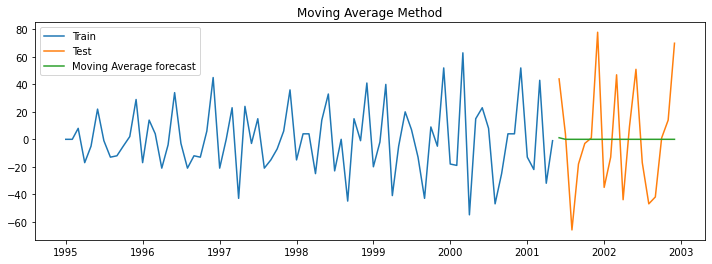

In [98]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['MA_forecast'][test.index.min():], label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [99]:
mse = mean_squared_error(forecast_reg['MA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

39.87204320775605

# Auto regression moving average method (ARMA)

In [100]:
import warnings
warnings.filterwarnings("ignore")
model_arma = ARIMA(train_diff, order=(10, 0, 1)).fit()

In [101]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   ARMA Model Results                                   
========================================================================================
Dep. Variable:     Passengers Second Difference   No. Observations:                   77
Model:                              ARMA(10, 1)   Log Likelihood                -320.898
Method:                                 css-mle   S.D. of innovations             12.111
Date:                          Mon, 23 May 2022   AIC                            667.796
Time:                                  00:09:05   BIC                            698.266
Sample:                              01-01-1995   HQIC                           679.984
                                   - 05-01-2001                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0264        nan        nan        nan         nan         nan
ar.L1.Passengers Second Difference     -0.2078        nan        nan        nan         nan         nan
ar.L2.Passengers Second Difference     -0.5932   1.91e-06  -3.11e+05      0.000      -0.593      -0.593
ar.L3.Passengers Second Difference     -0.3224   4.07e-06  -7.92e+04      0.000      -0.322      -0.322
ar.L4.Passengers Second Difference     -0.6658   1.38e-05  -4.84e+04      0.000      -0.666      -0.666
ar.L5.Passengers Second Difference     -0.3248   2.61e-06  -1.24e+05      0.000      -0.325      -0.325
ar.L6.Passengers Second Difference     -0.5374        nan        nan        nan         nan         nan
ar.L7.Passengers Second Difference     -0.3754        nan        nan        nan         nan         nan
ar.L8.Passengers Second Difference     -0.6710        nan        nan        nan         nan         nan
ar.L9.Passengers Second Difference     -0.3248        nan        nan        nan         nan         nan
ar.L10.Passengers Second Difference    -0.6791        nan        nan        nan         nan         nan
ma.L1.Passengers Second Difference     -1.0000        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8662           -0.4996j            1.0000           -0.0833
AR.2             0.8662           +0.4996j            1.0000            0.0833
AR.3             0.4893           -0.8865j            1.0125           -0.1697
AR.4             0.4893           +0.8865j            1.0125            0.1697
AR.5            -0.9649           -0.4196j            1.0522           -0.4347
AR.6            -0.9649           +0.4196j            1.0522            0.4347
AR.7            -0.5892           -0.8604j            1.0428           -0.3456
AR.8            -0.5892           +0.8604j            1.0428            0.3456
AR.9            -0.0406           -1.0915j            1.0923           -0.2559
AR.10           -0.0406           +1.0915j            1.0923            0.2559
MA.1             1.0000           +0.0000j            1.0000            0.0000
------------------------------------------------------------------------------
"""

In [102]:
forecast_reg['ARMA_forecast'] = model_arma.predict(start = pred_start_date,end = pred_end_date)

In [103]:
forecast_reg

,Passengers,AR_forecast,MA_forecast,ARMA_forecast
Month,,,,
2001-06-01,315,18.455507,1.153326,37.243786
2001-07-01,364,-18.380846,-0.001037,-17.702866
2001-08-01,347,-14.691962,-0.001037,-32.804548
2001-09-01,312,4.824939,-0.001037,-9.210811
2001-10-01,274,2.437052,-0.001037,-12.516064
2001-11-01,237,6.219580,-0.001037,18.152681
2001-12-01,278,16.139742,-0.001037,37.166474
2002-01-01,284,-15.271529,-0.001037,-20.122838
2002-02-01,277,6.504676,-0.001037,9.102218


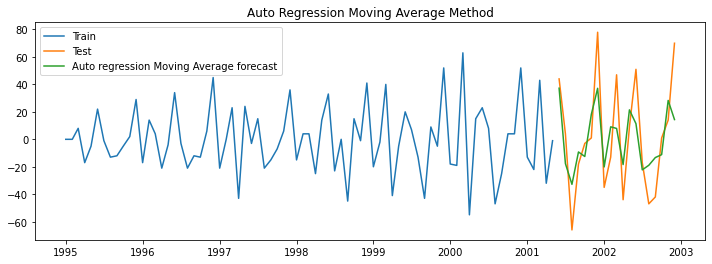

In [104]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['ARMA_forecast'][test.index.min():], label='Auto regression Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regression Moving Average Method')
plt.show()

In [105]:
mse = mean_squared_error(forecast_reg['ARMA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

26.607753166173627

# Auto regressive integrated moving average (ARIMA)

In [106]:
import warnings
warnings.filterwarnings("ignore")
model_arima = ARIMA(train_diff, order=(10, 2, 1)).fit()

In [107]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARIMA Model Results                                    
===========================================================================================
Dep. Variable:     D2.Passengers Second Difference   No. Observations:                   75
Model:                             ARIMA(10, 2, 1)   Log Likelihood                -338.615
Method:                                    css-mle   S.D. of innovations             20.554
Date:                             Mon, 23 May 2022   AIC                            703.231
Time:                                     00:10:43   BIC                            733.358
Sample:                                 03-01-1995   HQIC                           715.260
                                      - 05-01-2001                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.0266      0.188      0.142      0.887      -0.342       0.395
ar.L1.D2.Passengers Second Difference     -1.9526      0.148    -13.175      0.000      -2.243      -1.662
ar.L2.D2.Passengers Second Difference     -2.6471      0.331     -7.995      0.000      -3.296      -1.998
ar.L3.D2.Passengers Second Difference     -2.9174      0.519     -5.619      0.000      -3.935      -1.900
ar.L4.D2.Passengers Second Difference     -2.7721      0.663     -4.179      0.000      -4.072      -1.472
ar.L5.D2.Passengers Second Difference     -2.2121      0.743     -2.976      0.003      -3.669      -0.755
ar.L6.D2.Passengers Second Difference     -1.4036      0.733     -1.914      0.056      -2.841       0.034
ar.L7.D2.Passengers Second Difference     -0.5101      0.639     -0.799      0.424      -1.762       0.742
ar.L8.D2.Passengers Second Difference      0.1326      0.476      0.278      0.781      -0.801       1.066
ar.L9.D2.Passengers Second Difference      0.5207      0.291      1.792      0.073      -0.049       1.090
ar.L10.D2.Passengers Second Difference     0.4441      0.116      3.839      0.000       0.217       0.671
ma.L1.D2.Passengers Second Difference      0.0917      0.136      0.673      0.501      -0.175       0.359
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0850           -0.0000j            1.0850           -0.5000
AR.2            -0.9010           -0.4988j            1.0299           -0.4195
AR.3            -0.9010           +0.4988j            1.0299            0.4195
AR.4            -0.5066           -0.8863j            1.0208           -0.3326
AR.5            -0.5066           +0.8863j            1.0208            0.3326
AR.6             0.0143           -1.0415j            1.0416           -0.2478
AR.7             0.0143           +1.0415j            1.0416            0.2478
AR.8             0.5297           -0.8801j            1.0272           -0.1638
AR.9             0.5297           +0.8801j            1.0272            0.1638
AR.10            1.6398           -0.0000j            1.6398           -0.0000
MA.1           -10.9065           +0.0000j           10.9065            0.5000
------------------------------------------------------------------------------
"""

In [108]:
forecast_reg['ARIMA_forecast'] = model_arima.predict(start = pred_start_date,end = pred_end_date)

In [109]:
forecast_reg

,Passengers,AR_forecast,MA_forecast,ARMA_forecast,ARIMA_forecast
Month,,,,,
2001-06-01,315,18.455507,1.153326,37.243786,10.726124
2001-07-01,364,-18.380846,-0.001037,-17.702866,-53.621278
2001-08-01,347,-14.691962,-0.001037,-32.804548,-34.746042
2001-09-01,312,4.824939,-0.001037,-9.210811,59.434497
2001-10-01,274,2.437052,-0.001037,-12.516064,-2.816431
2001-11-01,237,6.219580,-0.001037,18.152681,-13.754039
2001-12-01,278,16.139742,-0.001037,37.166474,51.958771
2002-01-01,284,-15.271529,-0.001037,-20.122838,-100.532963
2002-02-01,277,6.504676,-0.001037,9.102218,46.148428


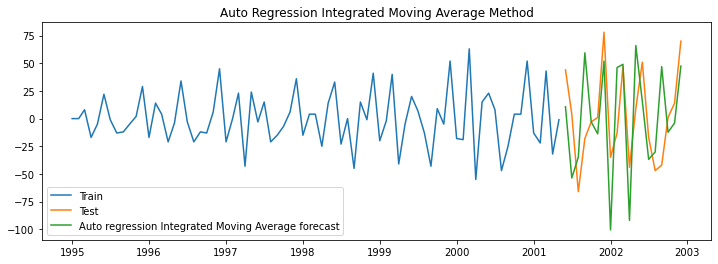

In [110]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['ARIMA_forecast'][test.index.min():], label='Auto regression Integrated Moving Average forecast')
plt.legend(loc='best')
plt.title('Auto Regression Integrated Moving Average Method')
plt.show()

In [111]:
mse = mean_squared_error(forecast_reg['ARIMA_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

43.8205436609674

# Seasonal auto regressive integrated moving average (SARIMA)

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
import warnings
warnings.filterwarnings("ignore")
model_SARIMA=SARIMAX(train_diff,order=(10,2,10),seasonal_order=(1,2,1,12)).fit()

In [114]:
forecast_reg['SARIMAX_forecast'] = model_SARIMA.predict(start = pred_start_date,end = pred_end_date)

In [115]:
forecast_reg

,Passengers,AR_forecast,MA_forecast,ARMA_forecast,ARIMA_forecast,SARIMAX_forecast
Month,,,,,,
2001-06-01,315,18.455507,1.153326,37.243786,10.726124,38.564039
2001-07-01,364,-18.380846,-0.001037,-17.702866,-53.621278,-10.225704
2001-08-01,347,-14.691962,-0.001037,-32.804548,-34.746042,-17.286686
2001-09-01,312,4.824939,-0.001037,-9.210811,59.434497,-51.498510
2001-10-01,274,2.437052,-0.001037,-12.516064,-2.816431,18.785818
2001-11-01,237,6.219580,-0.001037,18.152681,-13.754039,-7.532722
2001-12-01,278,16.139742,-0.001037,37.166474,51.958771,61.709480
2002-01-01,284,-15.271529,-0.001037,-20.122838,-100.532963,-18.540085
2002-02-01,277,6.504676,-0.001037,9.102218,46.148428,-21.134999


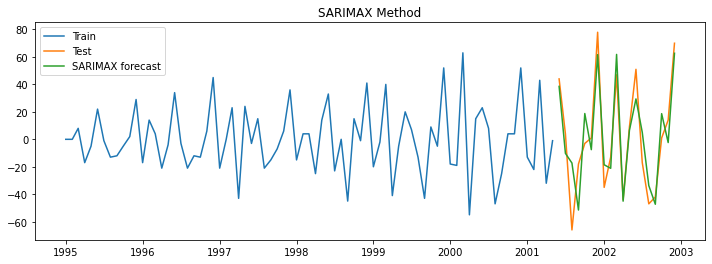

In [116]:
plt.figure(figsize=(12,4))
plt.plot(train_diff, label='Train')
plt.plot(test_diff, label='Test')
plt.plot(forecast_reg['SARIMAX_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX Method')
plt.show()

In [117]:
mse = mean_squared_error(forecast_reg['SARIMAX_forecast'],test_diff)
RMSE = np.sqrt(mse)
RMSE

19.05044464345866

# **Conclusion : Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that:
# 1 .exponential weighted moving average
# 2.Seasonal auto regressive integrated moving average (SARIMA) technique.
# are the best for forecasting the sales for the data.
# Both the methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data